In [1]:
# Load Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import os

In [2]:
# Import ECA_data.csv to notebook
dataset = pd.read_csv('ECA_data.csv')

In [3]:
# Load Dataset
dataset.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


## Question 1

In [4]:
# Check Datatypes for Dataframe
dataset.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object

In [5]:
dataset.select_dtypes(include=['int']).dtypes #find all the numeric variables

ID        int64
LIMIT     int64
INCOME    int64
RATING    int64
GENDER    int64
AGE       int64
S1        int64
S2        int64
S3        int64
S4        int64
S5        int64
B1        int64
B2        int64
B3        int64
B4        int64
B5        int64
R1        int64
R2        int64
R4        int64
R5        int64
dtype: object

In [6]:
dataset.select_dtypes(include=['object']).dtypes #Find all the objects, possible categorical variables

R3    object
dtype: object

## Question 2

In [7]:
#1- Removing Duplicate Rows
#2- Replacing Null Values with Modes of Each Respective Column
#3- Cleaning Noisy Data (-1 values and 199) for the "AGE" Column
#4- Fixing Datatype/Variable Type Inconsistency for Column R3 to Match with Other R Variable's Datatypes
#4- Fixing "Value Error" in Variable Column R3 ('$' and ',') that can be replaced

# Extra
#- Replacing Numerical Variables to Categorical
#- Creating Summary Table

#### 1) Removing Duplicate Rows

In [8]:
dataset['ID'].value_counts()

132      2
420      2
378      2
1        1
12510    1
        ..
6257     1
6256     1
6255     1
6254     1
18766    1
Name: ID, Length: 18766, dtype: int64

In [9]:
dataset.describe()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,S5,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18756.000000,18731.000000,18769.000000,18769.000000,...,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,1.876900e+04,18769.000000,18769.000000,18769.000000
mean,9382.049710,168275.543716,9119.887343,177765.809100,0.219244,0.618307,1.789934,1.514922,35.578614,0.128776,...,0.038628,49985.762587,48168.321541,45025.373328,41058.509137,39624.961319,6.026392e+03,5651.754862,4764.085354,5185.538068
std,5418.203513,129405.294386,13045.368642,143092.431648,0.413746,0.485815,0.732326,0.519588,9.556397,0.954745,...,0.849596,71927.408384,70318.908697,66107.280567,61697.041169,59913.089587,2.289899e+04,18614.886581,15031.279673,17424.054451
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4690.000000,50000.000000,640.325000,56494.000000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,...,0.000000,3081.000000,2845.000000,2513.000000,1950.000000,1430.000000,1.000000e+03,579.000000,285.000000,215.000000
50%,9382.000000,140000.000000,3959.025000,148225.000000,0.000000,1.000000,2.000000,2.000000,34.000000,0.000000,...,0.000000,21386.000000,20421.000000,19502.000000,18356.000000,17419.000000,2.132000e+03,2000.000000,1508.000000,1547.000000
75%,14074.000000,240000.000000,11975.250000,256826.000000,0.000000,1.000000,2.000000,2.000000,41.000000,0.000000,...,0.000000,65145.000000,61943.000000,57687.000000,50758.000000,49792.000000,5.002000e+03,5000.000000,4068.000000,4095.000000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,3.000000,2.000000,199.000000,7.000000,...,7.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,426529.000000,527143.000000


In [10]:
# There are some duplicated records (132, 378, and 420)
# In this case we can remove one for each

# Function to Remove Duplicates
dataset.drop_duplicates(subset=None, keep='first', inplace=True)

In [11]:
dataset['ID'].value_counts() # shows that there are no more duplicated ID

1        1
12500    1
12516    1
12515    1
12514    1
        ..
6255     1
6254     1
6253     1
6252     1
18766    1
Name: ID, Length: 18766, dtype: int64

In [12]:
dataset.describe() # count and max ID are now the same, meaning there are no more duplicate records

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,S5,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18753.000000,18728.000000,18766.000000,18766.000000,...,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,1.876600e+04,18766.000000,18766.000000,18766.000000
mean,9383.500000,168277.399552,9119.056069,177768.780614,0.219226,0.618246,1.789954,1.514897,35.579079,0.128743,...,0.038687,49979.071832,48162.811681,45019.445646,41052.452414,39617.665299,6.025992e+03,5651.800863,4763.237397,5185.887456
std,5417.421911,129410.434971,13044.255393,143098.786811,0.413733,0.485830,0.732359,0.519592,9.556664,0.954688,...,0.849630,71920.091796,70311.911232,66098.316428,61686.545919,59899.415291,2.290072e+04,18616.317826,15032.073417,17425.342718
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4692.250000,50000.000000,640.193750,56498.500000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,...,0.000000,3079.500000,2845.000000,2510.750000,1950.000000,1429.250000,1.000000e+03,579.000000,284.250000,215.250000
50%,9383.500000,140000.000000,3959.550000,148210.500000,0.000000,1.000000,2.000000,2.000000,34.000000,0.000000,...,0.000000,21375.000000,20422.500000,19502.500000,18359.000000,17419.500000,2.131500e+03,2000.000000,1507.000000,1547.000000
75%,14074.750000,240000.000000,11975.031250,256844.750000,0.000000,1.000000,2.000000,2.000000,41.000000,0.000000,...,0.000000,65137.500000,61932.250000,57679.500000,50758.000000,49789.500000,5.002000e+03,5000.000000,4063.750000,4094.500000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,3.000000,2.000000,199.000000,7.000000,...,7.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,426529.000000,527143.000000


#### 2) Replacing Null Values with Modes of Each Respective Column

In [13]:
# Finding Null Values
dataset.isnull().sum() # See total null values in each column

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [14]:
dataset[dataset.isna().any(axis=1)] # Compile and see all rows that contains null values

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
521,519,290000,9195.725,294806,0,1,2.0,NaN,49,0,...,53829,53841,54486,55198,55878,1926,1931,1989,2002,2028
694,692,140000,13279.525,151880,0,0,3.0,NaN,47,0,...,67073,57233,52295,49047,38796,5017,10012,10013,3010,6015
819,817,80000,1237.250,74355,0,1,3.0,NaN,37,0,...,3087,5210,3882,4785,1000,5215,3882,4785,1968,0
847,845,30000,3525.025,20346,0,1,3.0,NaN,46,2,...,19532,22194,21542,24022,25473,3000,0,3000,2000,0
1501,1499,70000,2861.950,56633,0,1,3.0,NaN,34,2,...,17295,16720,18438,18004,19546,0,2000,0,2000,0
2594,2592,120000,578.725,143627,0,1,3.0,NaN,41,0,...,0,0,0,1344,881,0,0,1344,929,599
3400,3398,350000,891.625,344631,0,1,NaN,2.0,53,-1,...,4815,61044,22611,1385,6043,61349,22687,1389,6058,1153
3876,3874,210000,448.525,211085,0,0,NaN,2.0,45,0,...,5854,1032,788,3499,3372,1032,788,3565,3372,15381
5350,5348,20000,315.000,23066,0,0,3.0,NaN,29,4,...,1800,1800,1800,1800,1800,0,0,0,0,0
5650,5648,100000,1337.350,95891,0,0,NaN,2.0,37,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Replace Null Values with their Modes
dataset['EDUCATION'].fillna(dataset['EDUCATION'].mode() [0], inplace=True)
dataset['MARITAL'].fillna(dataset['MARITAL'].mode() [0], inplace=True)
dataset.isnull().sum()

ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

#### 3) Cleaning Noisy Data (-1 and 199 values) for the "AGE" Column

In [16]:
dataset.describe() # To look for data quality issues for each column, in this case, AGE column has negative and extreme values.

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,S5,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,...,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,1.876600e+04,18766.000000,18766.000000,18766.000000
mean,9383.500000,168277.399552,9119.056069,177768.780614,0.219226,0.618246,1.790099,1.515880,35.579079,0.128743,...,0.038687,49979.071832,48162.811681,45019.445646,41052.452414,39617.665299,6.025992e+03,5651.800863,4763.237397,5185.887456
std,5417.421911,129410.434971,13044.255393,143098.786811,0.413733,0.485830,0.732126,0.519524,9.556664,0.954688,...,0.849630,71920.091796,70311.911232,66098.316428,61686.545919,59899.415291,2.290072e+04,18616.317826,15032.073417,17425.342718
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4692.250000,50000.000000,640.193750,56498.500000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,...,0.000000,3079.500000,2845.000000,2510.750000,1950.000000,1429.250000,1.000000e+03,579.000000,284.250000,215.250000
50%,9383.500000,140000.000000,3959.550000,148210.500000,0.000000,1.000000,2.000000,2.000000,34.000000,0.000000,...,0.000000,21375.000000,20422.500000,19502.500000,18359.000000,17419.500000,2.131500e+03,2000.000000,1507.000000,1547.000000
75%,14074.750000,240000.000000,11975.031250,256844.750000,0.000000,1.000000,2.000000,2.000000,41.000000,0.000000,...,0.000000,65137.500000,61932.250000,57679.500000,50758.000000,49789.500000,5.002000e+03,5000.000000,4063.750000,4094.500000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,3.000000,2.000000,199.000000,7.000000,...,7.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,426529.000000,527143.000000


In [17]:
dataset['AGE'].value_counts() # To find and count how many -1 and 199 values can be found

 29     995
 27     944
 28     899
 30     872
 31     781
 26     773
 35     723
 32     722
 34     722
 25     722
 33     695
 36     675
 24     659
 37     657
 38     613
 39     602
 23     564
 40     564
 41     527
 42     498
 44     448
 43     420
 45     405
 46     375
 22     333
 47     310
 48     276
 49     274
 50     267
 51     204
 53     190
 52     187
 54     163
 55     142
 56     119
 58      75
 57      69
 59      52
 21      41
 61      37
 60      36
 62      28
 64      21
 63      16
 65      15
 66      13
 69       8
 67       8
-1        5
 199      5
 70       5
 68       2
 73       2
 72       2
 75       2
 71       1
 80       1
 79       1
 74       1
Name: AGE, dtype: int64

In [18]:
#Removing records containing -199 and -1
dataset.drop(dataset[dataset['AGE'] > 100].index, inplace = True)
dataset.drop(dataset[dataset['AGE'] < 0].index, inplace = True)

In [19]:
dataset['AGE'].value_counts() # Check if values are removed

29    995
27    944
28    899
30    872
31    781
26    773
35    723
32    722
34    722
25    722
33    695
36    675
24    659
37    657
38    613
39    602
23    564
40    564
41    527
42    498
44    448
43    420
45    405
46    375
22    333
47    310
48    276
49    274
50    267
51    204
53    190
52    187
54    163
55    142
56    119
58     75
57     69
59     52
21     41
61     37
60     36
62     28
64     21
63     16
65     15
66     13
69      8
67      8
70      5
68      2
72      2
75      2
73      2
80      1
79      1
71      1
74      1
Name: AGE, dtype: int64

In [20]:
dataset['AGE'].count() # Shows that 10 rows containing age -1 and 199 are removed

18756

#### 4) Fixing Datatype/Variable Type Inconsistency for Column R3 to Match with Other R Variable's Datatypes

In [21]:
dataset.info() #See Datatype for each variable columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18756 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18756 non-null  int64  
 1   LIMIT      18756 non-null  int64  
 2   BALANCE    18756 non-null  float64
 3   INCOME     18756 non-null  int64  
 4   RATING     18756 non-null  int64  
 5   GENDER     18756 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18756 non-null  float64
 8   AGE        18756 non-null  int64  
 9   S1         18756 non-null  int64  
 10  S2         18756 non-null  int64  
 11  S3         18756 non-null  int64  
 12  S4         18756 non-null  int64  
 13  S5         18756 non-null  int64  
 14  B1         18756 non-null  int64  
 15  B2         18756 non-null  int64  
 16  B3         18756 non-null  int64  
 17  B4         18756 non-null  int64  
 18  B5         18756 non-null  int64  
 19  R1         18756 non-null  int64  
 20  R2    

In [22]:
# There are some datatype inconsistencies for the variables and can be fixed
# Balance can be changed to an integer as well
# R3 variable should be an integer instead of an object because the variable column contains numbers and doesn't signifies any class 

In [23]:
# Changing BALANCE dtype to Integer
dataset['BALANCE'] = dataset['BALANCE'].astype('int64')

##### Fixing "Value Error" in Variable Column R3 ('$' and ',') that can be replaced

In [24]:
# Changing dtype R3 from object to int64
#dataset["R3"] = dataset["R3"].astype('str')
#dataset["R3"].astype('int')

#Changing the datatype doesn't work because there is a value Error
#ValueError: invalid literal for int() with base 10: '$0'

In [25]:
# Displaying rows with inconsistent datatype found in column ‘R3’
dataset[dataset['R3'].str.startswith('$')] #There seems to some values in R3 that are typed in '$' and ',' signs from ID 1798 - 1811, making the R3 variable column's dtype as object

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
1800,1798,120000,0,132691,0,1,2.0,1.0,28,0,...,0,0,0,0,0,0,0,$0,0,0
1801,1799,90000,14819,102269,0,1,2.0,1.0,35,0,...,81491,81003,68764,67957,69313,3914,2774,"$2,620",2640,3000
1802,1800,180000,565,208237,0,1,2.0,2.0,25,-1,...,12513,-628,4940,1740,390,0,10000,"$6,000",6000,1567
1803,1801,80000,10594,94482,0,1,1.0,2.0,32,0,...,61715,60582,61453,61858,61104,2100,2349,"$2,200",2200,2200
1804,1802,130000,68,151746,1,0,2.0,1.0,45,-1,...,390,390,390,390,0,390,390,$390,0,780
1805,1803,230000,3068,272850,0,1,1.0,2.0,26,0,...,13033,2688,2688,2688,6393,2688,2688,"$2,688",6393,6504
1806,1804,130000,629,144059,1,1,1.0,2.0,26,-1,...,4398,3738,1396,13069,1285,3746,1396,"$13,069",1285,1034
1807,1805,190000,30804,223013,0,0,2.0,2.0,33,0,...,166336,162100,155584,157988,154366,8004,5500,"$7,000",6000,5000
1808,1806,210000,31937,207501,0,1,1.0,2.0,31,0,...,187796,190227,127436,129714,131440,8000,5000,"$5,000",5000,5000
1809,1807,20000,1972,11639,0,1,3.0,1.0,52,0,...,13513,12999,14456,16313,15766,0,1686,"$2,089",0,0


In [26]:
# For easier analysis, we can remove '$' and ',' to make the variables fully numeric
dataset['R3'] = dataset['R3'].str.replace('$', '')
dataset['R3'] = dataset['R3'].str.replace(',', '')

C:\Users\joozk\AppData\Local\Temp\ipykernel_4972\208933996.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['R3'] = dataset['R3'].str.replace('$', '')


In [27]:
dataset.loc['1800':'1809'] # check if the value in R3 has changed

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
1800,1798,120000,0,132691,0,1,2.0,1.0,28,0,...,0,0,0,0,0,0,0,0,0,0
1801,1799,90000,14819,102269,0,1,2.0,1.0,35,0,...,81491,81003,68764,67957,69313,3914,2774,2620,2640,3000
1802,1800,180000,565,208237,0,1,2.0,2.0,25,-1,...,12513,-628,4940,1740,390,0,10000,6000,6000,1567
1803,1801,80000,10594,94482,0,1,1.0,2.0,32,0,...,61715,60582,61453,61858,61104,2100,2349,2200,2200,2200
1804,1802,130000,68,151746,1,0,2.0,1.0,45,-1,...,390,390,390,390,0,390,390,390,0,780
1805,1803,230000,3068,272850,0,1,1.0,2.0,26,0,...,13033,2688,2688,2688,6393,2688,2688,2688,6393,6504
1806,1804,130000,629,144059,1,1,1.0,2.0,26,-1,...,4398,3738,1396,13069,1285,3746,1396,13069,1285,1034
1807,1805,190000,30804,223013,0,0,2.0,2.0,33,0,...,166336,162100,155584,157988,154366,8004,5500,7000,6000,5000
1808,1806,210000,31937,207501,0,1,1.0,2.0,31,0,...,187796,190227,127436,129714,131440,8000,5000,5000,5000,5000
1809,1807,20000,1972,11639,0,1,3.0,1.0,52,0,...,13513,12999,14456,16313,15766,0,1686,2089,0,0


In [28]:
# Change R3 Variable Column to Integers
dataset['R3'] = dataset['R3'].astype('int64')

In [29]:
dataset.info() # Check if changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18756 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18756 non-null  int64  
 1   LIMIT      18756 non-null  int64  
 2   BALANCE    18756 non-null  int64  
 3   INCOME     18756 non-null  int64  
 4   RATING     18756 non-null  int64  
 5   GENDER     18756 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18756 non-null  float64
 8   AGE        18756 non-null  int64  
 9   S1         18756 non-null  int64  
 10  S2         18756 non-null  int64  
 11  S3         18756 non-null  int64  
 12  S4         18756 non-null  int64  
 13  S5         18756 non-null  int64  
 14  B1         18756 non-null  int64  
 15  B2         18756 non-null  int64  
 16  B3         18756 non-null  int64  
 17  B4         18756 non-null  int64  
 18  B5         18756 non-null  int64  
 19  R1         18756 non-null  int64  
 20  R2    

In [30]:
dataset

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


#### Extra: Replacing Numerical Variables to Categorical for a Better-Looking Table

In [31]:
# For GENDER
cleanup_gender = {"GENDER":   {0: "Male", 1: "Female"}}
dataset = dataset.replace(cleanup_gender)
dataset["GENDER"].value_counts()

Female    11598
Male       7158
Name: GENDER, dtype: int64

In [32]:
# For EDUCATION
cleanup_education = {"EDUCATION":   {0: "Others", 1: "Postgraduate", 2: "Tertiary", 3: "High School"}}
dataset = dataset.replace(cleanup_education)
dataset["EDUCATION"].value_counts()

Tertiary        8880
Postgraduate    6405
High School     3137
Others           334
Name: EDUCATION, dtype: int64

In [33]:
# For MARITAL
cleanup_marital = {"MARITAL":   {0: "Others", 1: "Single", 2: "Married"}}
dataset = dataset.replace(cleanup_marital)
dataset["MARITAL"].value_counts()

Married    9865
Single     8702
Others      189
Name: MARITAL, dtype: int64

In [34]:
# For S(n) - for values 1,2,3,4,5,6,7 are not required
cleanup_repaymentstatus = {"S1":   {-1: "Prompt payment", 0: "Minimum sum payment", 1:"Delayed Payment for 1 Months", 2:"Delayed Payment for 2 Months", 3:"Delayed Payment for 3 Months", 4:"Delayed Payment for 4 Months", 5:"Delayed Payment for 5 Months", 6:"Delayed Payment for 6 Months", 7:"Delayed Payment for 7 Months" },
                          "S2":   {-1: "Prompt payment", 0: "Minimum sum payment", 1:"Delayed Payment for 1 Months", 2:"Delayed Payment for 2 Months", 3:"Delayed Payment for 3 Months", 4:"Delayed Payment for 4 Months", 5:"Delayed Payment for 5 Months", 6:"Delayed Payment for 6 Months", 7:"Delayed Payment for 7 Months"},
                          "S3":   {-1: "Prompt payment", 0: "Minimum sum payment", 1:"Delayed Payment for 1 Months", 2:"Delayed Payment for 2 Months", 3:"Delayed Payment for 3 Months", 4:"Delayed Payment for 4 Months", 5:"Delayed Payment for 5 Months", 6:"Delayed Payment for 6 Months", 7:"Delayed Payment for 7 Months"},
                          "S4":   {-1: "Prompt payment", 0: "Minimum sum payment", 1:"Delayed Payment for 1 Months", 2:"Delayed Payment for 2 Months", 3:"Delayed Payment for 3 Months", 4:"Delayed Payment for 4 Months", 5:"Delayed Payment for 5 Months", 6:"Delayed Payment for 6 Months", 7:"Delayed Payment for 7 Months"},
                          "S5":   {-1: "Prompt payment", 0: "Minimum sum payment", 1:"Delayed Payment for 1 Months", 2:"Delayed Payment for 2 Months", 3:"Delayed Payment for 3 Months", 4:"Delayed Payment for 4 Months", 5:"Delayed Payment for 5 Months", 6:"Delayed Payment for 6 Months", 7:"Delayed Payment for 7 Months"}}
dataset = dataset.replace(cleanup_repaymentstatus)
dataset["S1"].value_counts()

Minimum sum payment             12364
Prompt payment                   3601
Delayed Payment for 2 Months     2466
Delayed Payment for 3 Months      208
Delayed Payment for 4 Months       72
Delayed Payment for 1 Months       19
Delayed Payment for 5 Months       13
Delayed Payment for 7 Months        8
Delayed Payment for 6 Months        5
Name: S1, dtype: int64

In [35]:
# For RATING
cleanup_rating = {"RATING":   {0: "Good", 1: "Bad"}}
dataset = dataset.replace(cleanup_rating)
dataset["RATING"].value_counts()

Good    14642
Bad      4114
Name: RATING, dtype: int64

In [36]:
# Fixing Dataset Dtypes from Numerical to Categorical
dataset['RATING'] = dataset['RATING'].astype('category')
dataset['GENDER'] = dataset['GENDER'].astype('category')
dataset['EDUCATION'] = dataset['EDUCATION'].astype('category')
dataset['MARITAL'] = dataset['MARITAL'].astype('category')
dataset['S1'] = dataset['S1'].astype('category')
dataset['S2'] = dataset['S2'].astype('category')
dataset['S3'] = dataset['S3'].astype('category')
dataset['S4'] = dataset['S4'].astype('category')
dataset['S5'] = dataset['S5'].astype('category')

In [37]:
# Check if dtypes have changed
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18756 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         18756 non-null  int64   
 1   LIMIT      18756 non-null  int64   
 2   BALANCE    18756 non-null  int64   
 3   INCOME     18756 non-null  int64   
 4   RATING     18756 non-null  category
 5   GENDER     18756 non-null  category
 6   EDUCATION  18756 non-null  category
 7   MARITAL    18756 non-null  category
 8   AGE        18756 non-null  int64   
 9   S1         18756 non-null  category
 10  S2         18756 non-null  category
 11  S3         18756 non-null  category
 12  S4         18756 non-null  category
 13  S5         18756 non-null  category
 14  B1         18756 non-null  int64   
 15  B2         18756 non-null  int64   
 16  B3         18756 non-null  int64   
 17  B4         18756 non-null  int64   
 18  B5         18756 non-null  int64   
 19  R1         18756 non-null

#### New Table for Visualization

In [38]:
df = dataset

In [39]:
#Re Ordering the Columns and Droping ID
df.drop(['ID'],axis=1,inplace=True)

columns = list(df.columns)
columns
columns[0],columns[3] = columns[3],columns[0]
columns[1],columns[4] = columns[4],columns[1]
columns[2],columns[5] = columns[5],columns[2]
columns[3],columns[6] = columns[6],columns[3]
columns[4],columns[8] = columns[8],columns[4]
columns[5],columns[9] = columns[9],columns[5]
columns[6],columns[10] = columns[10],columns[6]
columns[7],columns[11] = columns[11],columns[7]
columns[8],columns[12] = columns[12],columns[8]
df = df[columns]

In [40]:
df.info() # Double check dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18756 entries, 0 to 18768
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   RATING     18756 non-null  category
 1   GENDER     18756 non-null  category
 2   EDUCATION  18756 non-null  category
 3   MARITAL    18756 non-null  category
 4   S1         18756 non-null  category
 5   S2         18756 non-null  category
 6   S3         18756 non-null  category
 7   S4         18756 non-null  category
 8   S5         18756 non-null  category
 9   INCOME     18756 non-null  int64   
 10  LIMIT      18756 non-null  int64   
 11  AGE        18756 non-null  int64   
 12  BALANCE    18756 non-null  int64   
 13  B1         18756 non-null  int64   
 14  B2         18756 non-null  int64   
 15  B3         18756 non-null  int64   
 16  B4         18756 non-null  int64   
 17  B5         18756 non-null  int64   
 18  R1         18756 non-null  int64   
 19  R2         18756 non-null

In [41]:
df.head()

,RATING,GENDER,EDUCATION,MARITAL,S1,S2,S3,S4,S5,INCOME,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,Bad,Female,Postgraduate,Married,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,235822,...,0,0,0,0,0,0,0,0,0,0
1,Good,Male,Tertiary,Married,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,278481,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,Good,Male,High School,Single,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,431993,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,Good,Male,Tertiary,Single,Prompt payment,Delayed Payment for 2 Months,Delayed Payment for 2 Months,Prompt payment,Prompt payment,22368,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,Good,Female,Tertiary,Single,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,166900,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


## Question 3

#### 1) Calculating the Number of Customers with Good and Bad Rating


In [42]:
# As a Creddit Facility, we would like to understand our customer's demographic. Therefore, we need to see if we have more good customers or not.

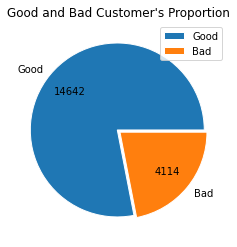

In [43]:
# Creating Dataset and Piechart
good = df.loc[df['RATING']=='Good'].count()[0]
bad = df.loc[df['RATING']=='Bad'].count()[0]
my_data = [good, bad]

#Label
labels = ['Good', 'Bad']
#Explode
explode = [0.02,0.02]

#Pie Chart Label Inside
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:d}".format(absolute, pct)

plt.pie(my_data,autopct=lambda pct:func(pct, my_data), pctdistance=0.7, wedgeprops={'edgecolor': 'white'}, explode = explode, labels = labels)

plt.title('Good and Bad Customer\'s Proportion')

#Legend
plt.legend()

# Show Plot
plt.show()

#### 2) Relationship between Customer's Education and their Rating

In [44]:
# To study if Education have significance to a customer's borrowing behaviour based on their Ratings

In [45]:
df['RATING'].value_counts()

Good    14642
Bad      4114
Name: RATING, dtype: int64

In [46]:
df['EDUCATION'].value_counts()

Tertiary        8880
Postgraduate    6405
High School     3137
Others           334
Name: EDUCATION, dtype: int64

In [47]:
good_and_others = df.loc[
    df.RATING.eq("Good") & df.EDUCATION.isin(["Others"]) 
]
print(len(good_and_others))

308


In [48]:
bad_and_others = df.loc[
    df.RATING.eq("Bad") & df.EDUCATION.isin(["Others"]) 
]
print(len(bad_and_others))

26


In [49]:
good_and_postgraduate = df.loc[
    df.RATING.eq("Good") & df.EDUCATION.isin(["Postgraduate"]) 
]
print(len(good_and_postgraduate))

5240


In [50]:
bad_and_postgraduate = df.loc[
    df.RATING.eq("Bad") & df.EDUCATION.isin(["Postgraduate"]) 
]
print(len(bad_and_postgraduate))

1165


In [51]:
good_and_tertiary = df.loc[
    df.RATING.eq("Good") & df.EDUCATION.isin(["Tertiary"]) 
]
print(len(good_and_tertiary))

6759


In [52]:
bad_and_tertiary = df.loc[
    df.RATING.eq("Bad") & df.EDUCATION.isin(["Tertiary"]) 
]
print(len(bad_and_tertiary))

2121


In [53]:
good_and_highschool = df.loc[
    df.RATING.eq("Good") & df.EDUCATION.isin(["High School"]) 
]
print(len(good_and_highschool))

2335


In [54]:
bad_and_highschool = df.loc[
    df.RATING.eq("Bad") & df.EDUCATION.isin(["High School"]) 
]
print(len(bad_and_highschool))

802


In [55]:
rating_education = [['Good',308,5240,6759,2335],['Bad',26, 1165, 2121, 802]]

In [56]:
df1 = pd.DataFrame (rating_education, columns=['Customer Rating','Others','Postgraduate','Tertiary','High School'])
df1                

,Customer Rating,Others,Postgraduate,Tertiary,High School
0,Good,308,5240,6759,2335
1,Bad,26,1165,2121,802


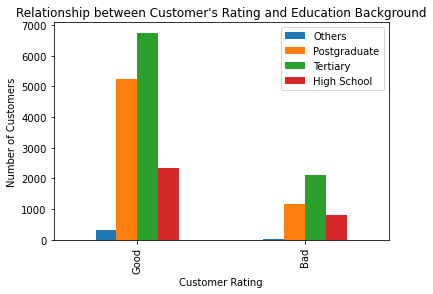

In [57]:
#Making Chart

import matplotlib.pyplot as plt

# Define Values
fix, ax = plt.subplots()
xs = 'Customer Rating'
ys = ['Others','Postgraduate','Tertiary','High School']


#Creating Plot using Panda
ax1 = df1.plot(x =xs , kind='bar', y= ys,ax=ax, label = ys) 


#Axis Labels
ax1.set_ylabel('Number of Customers')
           
plt.title('Relationship between Customer\'s Rating and Education Background')

plt.show()

#### 3) Finding Customer's Age Distribution

In [58]:
AGE = df['AGE']

Text(40, 5000, 'median=34.0')

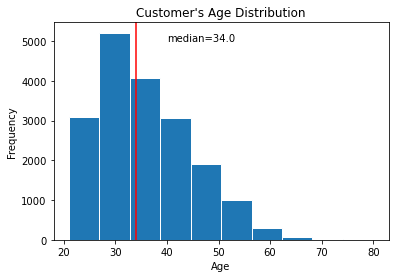

In [59]:
plt.hist(AGE, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Customer\'s Age Distribution')
plt.axvline(np.median(AGE),color='red')
plt.text(40,5000,'median={0}'.format(np.median(AGE)))


#### 4) Relationship between Previous Average Monthly Repayment by Different Income Groups

In [60]:
# This is to study if people with more incomes are more wiling to pay for their Credit
df['INCOME'].describe()

count     18756.000000
mean     177797.591544
std      143098.555996
min       10000.000000
25%       56541.750000
50%      148225.500000
75%      256994.750000
max      908846.000000
Name: INCOME, dtype: float64

In [61]:
# To see grouping
df['INCOME'].value_counts(bins=3)

(9101.153, 309615.333]      15451
(309615.333, 609230.667]     3231
(609230.667, 908846.0]         74
Name: INCOME, dtype: int64

In [62]:
# Calculating Mean Repayment Amount for low Income
df_low = df[(df['INCOME'] > 0) & (df['INCOME'] <= 310000)] # Calculate Mean Repayment for Incomes Lower than 310000
df_low.iloc[:,18:24].apply(np.mean)

R1    4528.992364
R2    4276.138420
R3    3759.441274
R4    3599.869346
R5    3882.010095
dtype: float64

In [63]:
# Calculating Mean Repayment Amount for Medium Income
df_med = df[(df['INCOME'] > 310000) & (df['INCOME'] <= 610000)] # Calculate Mean Repayment for Incomes in between 310000 and 610000
df_med.iloc[:,18:24].apply(np.mean)

R1    12804.362651
R2    11788.980799
R3    10220.963766
R4     9836.997832
R5    11132.758749
dtype: float64

In [64]:
# Calculating Mean Repayment Amount for To High Income
df_high = df[(df['INCOME'] > 610000) & (df['INCOME'] <= 1000000)] # Calculate Mean Repayment for Incomes in between 610000 and 1000000
df_high.iloc[:,18:24].apply(np.mean)

R1    23400.662162
R2    25631.554054
R3    20568.581081
R4    26783.216216
R5    18536.432432
dtype: float64

In [65]:
repayment_incomegroup = [['Low Income',4529,4276,3759,3600,3882],['Medium Income',12804, 11789, 10221,9837,11133],['High Income',23401, 25632, 20569,26783,18536]]

In [66]:
# Making Dataframe for Bar Chart 
df2 = pd.DataFrame(repayment_incomegroup, columns=['Income Groups','Recent Month','Previous 1 Month','Previous 2 Months','Previous 3 Months','Previous 4 Months'])
df2

,Income Groups,Recent Month,Previous 1 Month,Previous 2 Months,Previous 3 Months,Previous 4 Months
0,Low Income,4529,4276,3759,3600,3882
1,Medium Income,12804,11789,10221,9837,11133
2,High Income,23401,25632,20569,26783,18536


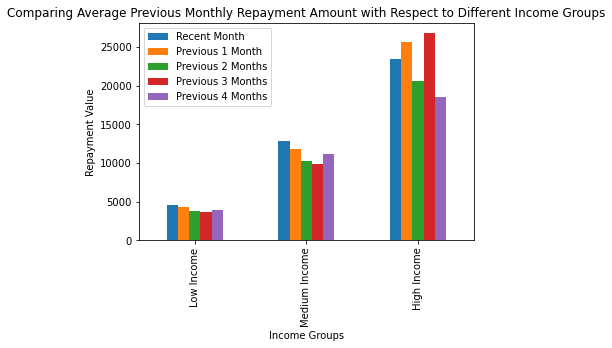

In [67]:
#Making Chart

import matplotlib.pyplot as plt

# Define Values
fix, ax = plt.subplots()
xs = 'Income Groups'
ys = ['Recent Month','Previous 1 Month','Previous 2 Months','Previous 3 Months','Previous 4 Months']


#Creating Plot using Panda
ax1 = df2.plot(x =xs , kind='bar', y= ys,ax=ax, label = ys) 


#Axis Labels
ax1.set_ylabel('Repayment Value')

plt.title('Comparing Average Previous Monthly Repayment Amount with Respect to Different Income Groups')
           
plt.show()

#### 5) Comparing Loan Balance and All Previous Repayment Amount for Different Genders

In [68]:
# Calculating Mean for Credit Balance for Male
df_male = df[df['GENDER'] == 'Male']
df_male.iloc[:,12:13].apply(np.mean)

BALANCE    9696.649763
dtype: float64

In [69]:
# Calculating Mean for All Repayment Amount for Male
df_male = df[df['GENDER'] == 'Male'] 
df_male.iloc[:,18:25].apply(np.mean)

R1    6056.434339
R2    5903.787650
R3    5049.542330
R4    4685.948030
R5    5234.241548
dtype: float64

In [70]:
# Mean Repayment Amount for Male
print((6056.434339
+    5903.787650
+    5049.542330
+    4685.948030
+    5234.241548) /5)

5385.9907794


In [71]:
# Calculating Mean for Credit Balance for Female
df_female = df[df['GENDER'] == 'Female'] 
df_female.iloc[:,12:13].apply(np.mean)

BALANCE    8764.596137
dtype: float64

In [72]:
# Calculating Mean for All Repayment Amount for Female
df_female = df[df['GENDER'] == 'Female'] 
df_female.iloc[:,18:25].apply(np.mean)

R1    6010.648215
R2    5499.500690
R3    4869.424815
R4    4813.966977
R5    5159.628815
dtype: float64

In [73]:
# Mean Repayment Amount for Female
print((6010.648215
+    5499.500690
+    4869.424815
+    4813.966977
+    5159.628815) /5)

5270.6339024


In [74]:
print(5386/9697*100) # Percent Amount Repaid on Average for Male

55.54295142827679


In [75]:
print(5271/8765*100) # Percent Amount Repaid on Average for Female

60.13690815744438


In [76]:
gender_recent = [['Male',9697,5386,56],['Female',8765, 5271,60]]

In [77]:
# Making Dataframe for Bar Chart 
fd1 = pd.DataFrame(gender_recent, columns=['Gender','Average Credit Balance','Average Repaid Amount','Percentage Amount Repaid over Current Credit Balance'])
fd1

,Gender,Average Credit Balance,Average Repaid Amount,Percentage Amount Repaid over Current Credit Balance
0,Male,9697,5386,56
1,Female,8765,5271,60


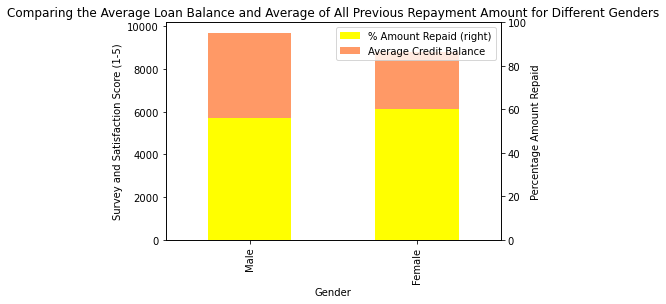

In [78]:
#Making Chart

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Define Values
fix, ax = plt.subplots()
xs = 'Gender'
ys = ['Average Credit Balance']


#Creating Plot using Panda
ax1 = fd1.plot (secondary_y=True, kind='bar', y='Percentage Amount Repaid over Current Credit Balance',ax=ax, color= 'yellow', label = '% Amount Repaid')
ax2 = fd1.plot(x =xs , kind='bar', y= ys,ax=ax, color = ['#ff9966','lightgray'], label = ys) 


#Axis Labels
ax1.set_ylabel('Percentage Amount Repaid')
ax2.set_ylabel('Survey and Satisfaction Score (1-5)')
           
# y axis limit
ax1.set_ylim(0,100)
ax2.set_ylim()

plt.title('Comparing the Average Loan Balance and Average of All Previous Repayment Amount for Different Genders')

plt.show()

## Question 4

#### Reading and Preparing Data

In [79]:
# Import Libraries
import pandas as pd
import numpy as np

In [80]:
df.head() # Show Dataset

,RATING,GENDER,EDUCATION,MARITAL,S1,S2,S3,S4,S5,INCOME,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,Bad,Female,Postgraduate,Married,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,235822,...,0,0,0,0,0,0,0,0,0,0
1,Good,Male,Tertiary,Married,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,278481,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,Good,Male,High School,Single,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,431993,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,Good,Male,Tertiary,Single,Prompt payment,Delayed Payment for 2 Months,Delayed Payment for 2 Months,Prompt payment,Prompt payment,22368,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,Good,Female,Tertiary,Single,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,Minimum sum payment,166900,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


In [81]:
reg = df

In [82]:
reg.info() # View variables in the Dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18756 entries, 0 to 18768
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   RATING     18756 non-null  category
 1   GENDER     18756 non-null  category
 2   EDUCATION  18756 non-null  category
 3   MARITAL    18756 non-null  category
 4   S1         18756 non-null  category
 5   S2         18756 non-null  category
 6   S3         18756 non-null  category
 7   S4         18756 non-null  category
 8   S5         18756 non-null  category
 9   INCOME     18756 non-null  int64   
 10  LIMIT      18756 non-null  int64   
 11  AGE        18756 non-null  int64   
 12  BALANCE    18756 non-null  int64   
 13  B1         18756 non-null  int64   
 14  B2         18756 non-null  int64   
 15  B3         18756 non-null  int64   
 16  B4         18756 non-null  int64   
 17  B5         18756 non-null  int64   
 18  R1         18756 non-null  int64   
 19  R2         18756 non-null

In [83]:
# Taking some variables that might affect B1, removing the rest
reg.drop(['LIMIT','S1','RATING','S2','S3','S4','S5','B2','B3','B4','B5','R1','R2','R3','R4','R5'],axis=1,inplace=True)
reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18756 entries, 0 to 18768
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GENDER     18756 non-null  category
 1   EDUCATION  18756 non-null  category
 2   MARITAL    18756 non-null  category
 3   INCOME     18756 non-null  int64   
 4   AGE        18756 non-null  int64   
 5   BALANCE    18756 non-null  int64   
 6   B1         18756 non-null  int64   
dtypes: category(3), int64(4)
memory usage: 788.1 KB


C:\Users\joozk\AppData\Local\Temp\ipykernel_4972\182105879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg.drop(['LIMIT','S1','RATING','S2','S3','S4','S5','B2','B3','B4','B5','R1','R2','R3','R4','R5'],axis=1,inplace=True)


#### Encoding Dataset Variables that are Categorized

In [84]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [85]:
# Enconding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [86]:
# New Reg Dataset with Encoded Variables
reg = MultiColumnLabelEncoder(columns = ['GENDER','EDUCATION','MARITAL']).fit_transform(reg)

#### Evaluating Linear Regression Model using 6 X Coefficients

In [87]:
# Importing the dataset and Extracting the Independent and Dependent Variables
X = reg.iloc[:,:-1].values # All except B1 values
y = reg.iloc[:,6].values # B1 values
reg.head()

,GENDER,EDUCATION,MARITAL,INCOME,AGE,BALANCE,B1
0,0,2,0,235822,30,0,0
1,1,3,0,278481,31,10928,54074
2,1,0,2,431993,51,65397,343591
3,1,3,2,22368,58,3695,21470
4,0,3,2,166900,42,68,1260


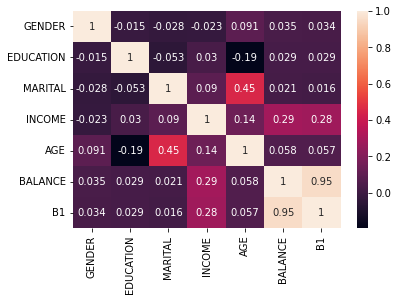

In [88]:
# Data Visualisation
# BUilding the Correlation Matrix
sns.heatmap(reg.corr(), annot = True)
plt.show()

In [89]:
X = X[:,:6] # coefficients for X since all are useful to make predictions for B1

In [90]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [92]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 6626.63828067, 51794.20021084,  7925.79793568, ...,
        2957.09110752,  3095.41630291, 32342.91923306])

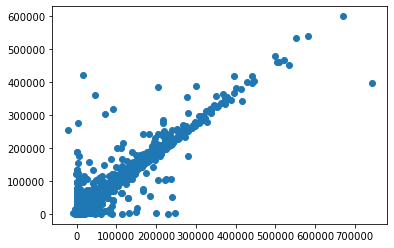

In [93]:
plt.scatter(y_test,y_pred)

In [94]:
from sklearn import metrics
print('Means Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Means Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Means Absolute Error: 8795.444129775098
Means Squared Error: 517221011.89898497


In [95]:
# Calculating Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [96]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 8795.44
Mean squared error: 517221011.90
Root mean squared error: 22742.49


## Question 5

In [97]:
# Calculating the Coefficients
print(regressor.coef_)

[ 7.17483255e+01 -8.63181624e+01 -5.16630688e+02  3.02225351e-03
  3.25311980e+01  5.22026172e+00]


In [98]:
# Calculating Intercept
print(regressor.intercept_)

1393.6814852840253


In [99]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9002640127216206

In [100]:
# Linear Regression Equation with 6 Coefficients
# 7.17GENDER - 8.63EDUCATION - 5.16MARITAL + 3.02INCOME + 3.25AGE  5.22BALANCE + 1393.68


#### EXTRA

#### Data Preprocessing - Reshaping and doing Training Testing Split

In [101]:
y = reg['B1'].values.reshape(-1,1)
X = reg['BALANCE'].values.reshape(-1,1)

In [102]:
#print(reg['BALANCE'].values)
#print(reg['BALANCE'].values.shape)

In [103]:
#print(X.shape)
#print(X)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [105]:
SEED = 42

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = SEED)

In [107]:
print(X_train)
print(y_train) 

[[48499]
 [ 7156]
 [10580]
 ...
 [ 8392]
 [ 8236]
 [22732]]
[[272579]
 [ 42416]
 [ 54438]
 ...
 [ 48854]
 [ 48410]
 [134400]]


#### Training Linear Regression Model

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [109]:
regressor.fit(X_train, y_train)

LinearRegression()

In [110]:
print(regressor.intercept_)

[2061.90053096]


In [111]:
print(regressor.coef_)

[[5.24083659]]


#### Linear Regression Model

Text(0.5, 1.0, 'Linear Regression Modelling')

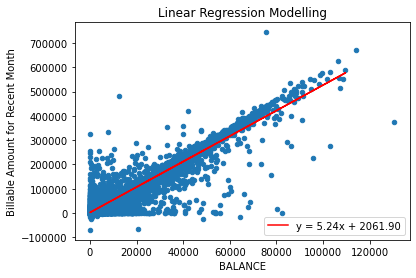

In [112]:
reg.plot.scatter(x='BALANCE', y='B1', title='Scatterplot of hours and scores percentages');

# Add Linear Regression Line to Scatterplot
m, b = np.polyfit(X_train.squeeze(), y_train.squeeze(), 1)
plt.plot(X_train.squeeze(), m*X_train.squeeze() + b, color='red', label = 'y = {:.2f}x + {:.2f}'.format(m, b))
plt.legend(loc='lower right')


# Add Labels
plt.xlabel('BALANCE')
plt.ylabel('Billable Amount for Recent Month')
plt.title('Linear Regression Modelling')

In [113]:
print(reg.describe())

             GENDER     EDUCATION       MARITAL         INCOME           AGE  \
count  18756.000000  18756.000000  18756.000000   18756.000000  18756.000000   
mean       0.381638      2.121135      0.937993  177797.591544     35.545266   
std        0.485801      1.070353      0.993041  143098.555996      9.159741   
min        0.000000      0.000000      0.000000   10000.000000     21.000000   
25%        0.000000      2.000000      0.000000   56541.750000     28.000000   
50%        0.000000      2.000000      0.000000  148225.500000     34.000000   
75%        1.000000      3.000000      2.000000  256994.750000     41.000000   
max        1.000000      3.000000      2.000000  908846.000000     80.000000   

             BALANCE             B1  
count   18756.000000   18756.000000  
mean     9120.303103   49987.774579  
std     13044.845015   71921.637085  
min         0.000000  -69777.000000  
25%       639.750000    3085.500000  
50%      3961.000000   21397.000000  
75%     11976

In [114]:
# Linear Regression Equation y = 5.24x + 2061.90

#### Can be Used to Make Predictions

In [115]:
score = regressor.predict([[0]])
print(score)

[[2061.90053096]]


In [116]:
y_train_pred = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [117]:
reg_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(reg_preds)

      Actual      Predicted
0       -644    2061.900531
1     182401  155471.669204
2      79422   76209.256611
3      71263   81685.930848
4       3384    3660.355691
...      ...            ...
7498     410    3822.821625
7499    8249    8565.778740
7500   29104   26620.460793
7501   29276   27521.884687
7502    1414    3262.052110

[7503 rows x 2 columns]


#### Evaluation

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [119]:
import numpy as np

In [120]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [121]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 8851.93
Mean squared error: 529592930.16
Root mean squared error: 23012.89


In [122]:
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

In [123]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 8739.86
Mean squared error: 472991308.34
Root mean squared error: 21748.36


In [124]:
#Positive Linear Correlation, which means if the CREDIT BALANCE increases, so does the Billable Amount in the Reccent Month
#The Errors are quite high. We are missing the actual value by 23012.85 at most, which is 